In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the paths to the image data folders
path_dir = 'Glaucoma/Glaucoma/Glaucoma Dataset - 2'

# Define the parameters for the model
image_width, image_height = 150, 150
input_shape = (image_width, image_height, 3)
batch_size = 16
epochs = 15
num_classes = 4

# Create the data generator and load the images
data_generator = ImageDataGenerator(rescale=1./255)
train_data = data_generator.flow_from_directory(
    directory=path_dir,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Create the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit(
    train_data,
    steps_per_epoch=train_data.samples // batch_size,
    epochs=epochs
)

# Save the trained model
model.save('glaucoma_model.h5')



Found 4218 images belonging to 4 classes.



Epoch 1/15


263/263 [==============================] - 52s 192ms/step - loss: 0.8036 - accuracy: 0.6509
Epoch 2/15
263/263 [==============================] - 47s 179ms/step - loss: 0.5774 - accuracy: 0.7653
Epoch 3/15
263/263 [==============================] - 49s 186ms/step - loss: 0.5213 - accuracy: 0.7875
Epoch 4/15
263/263 [==============================] - 49s 188ms/step - loss: 0.4712 - accuracy: 0.8068
Epoch 5/15
263/263 [==============================] - 49s 187ms/step - loss: 0.4418 - accuracy: 0.8165
Epoch 6/15
263/263 [==============================] - 50s 189ms/step - loss: 0.4103 - accuracy: 0.8329
Epoch 7/15
263/263 [==============================] - 49s 187ms/step - loss: 0.4060 - accuracy: 0.8358
Epoch 8/15
263/263 [==============================] - 49s 187ms/step - loss: 0.3913 - accuracy: 0.8429
Epoch 9/15
263/263 [==============================] - 50s 189ms/step - loss: 0.3611 - accuracy: 0.8565
Epoch 10/15
263/263 [====

c:\Users\Jeyanand\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [2]:
import matplotlib.pyplot as plt

In [3]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


dict_keys(['loss', 'accuracy'])


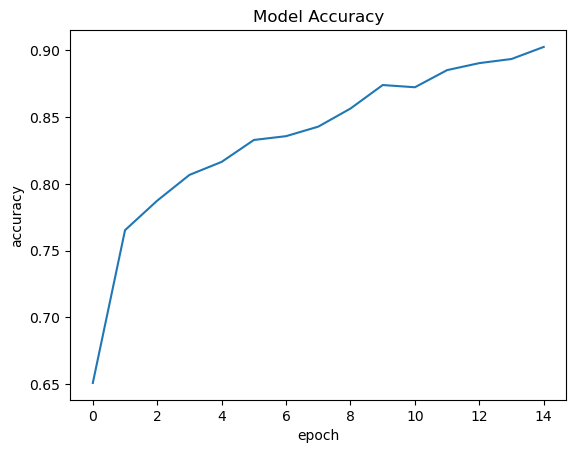

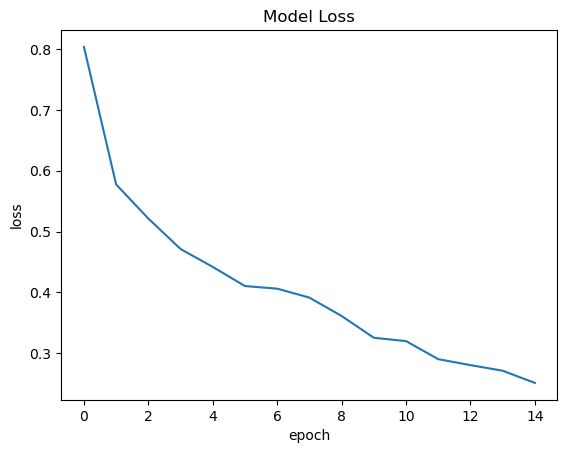

In [6]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing import image
import numpy as np
from keras import backend as K

In [ ]:
# Cataract
img_prd = load_img('Glaucoma/Glaucoma/Glaucoma Dataset - 2/cataract/103_left.jpg',target_size=(150,150))
img_prd = img_to_array(img_prd)
img_pred = np.expand_dims(img_prd, axis=0)

result = model.predict(img_pred)
print(result)

1/1 [==============================] - 0s 90ms/step
[[1. 0. 0. 0.]]


In [ ]:
# Cataract
img_prd = load_img('Glaucoma/Glaucoma/Glaucoma Dataset - 2/cataract/1084_right.jpg',target_size=(150,150))
img_prd = img_to_array(img_prd)
img_pred = np.expand_dims(img_prd, axis=0)

result = model.predict(img_pred)
print(result)

1/1 [==============================] - 0s 21ms/step
[[1. 0. 0. 0.]]


In [ ]:
# Diabetic
img_prd = load_img('Glaucoma/Glaucoma/Glaucoma Dataset - 2/diabetic_retinopathy/10003_left.jpeg',target_size=(150,150))
img_prd = img_to_array(img_prd)
img_pred = np.expand_dims(img_prd, axis=0)

result = model.predict(img_pred)
print(result)

1/1 [==============================] - 0s 21ms/step
[[0. 1. 0. 0.]]


In [ ]:
# Diabetic
img_prd = load_img('Glaucoma/Glaucoma/Glaucoma Dataset - 2/diabetic_retinopathy/10003_right.jpeg',target_size=(150,150))
img_prd = img_to_array(img_prd)
img_pred = np.expand_dims(img_prd, axis=0)

result = model.predict(img_pred)
print(result)

1/1 [==============================] - 0s 19ms/step
[[0. 1. 0. 0.]]


In [ ]:
# Glaucoma
img_prd = load_img('Glaucoma/Glaucoma/Glaucoma Dataset - 2/glaucoma/1209_left.jpg',target_size=(150,150))
img_prd = img_to_array(img_prd)
img_pred = np.expand_dims(img_prd, axis=0)

result = model.predict(img_pred)
print(result)

1/1 [==============================] - 0s 19ms/step
[[0. 0. 1. 0.]]


In [ ]:
# Glaucoma
img_prd = load_img('Glaucoma/Glaucoma/Glaucoma data - 1/Glaucoma/2 (1).jpg',target_size=(150,150))
img_prd = img_to_array(img_prd)
img_pred = np.expand_dims(img_prd, axis=0)

result = model.predict(img_pred)
print(result)

1/1 [==============================] - 0s 20ms/step
[[0. 1. 0. 0.]]


In [ ]:
# Normal
img_prd = load_img('Glaucoma/Glaucoma/Glaucoma data - 1/Non Glaucoma/1 (12).tif',target_size=(150,150))
img_prd = img_to_array(img_prd)
img_pred = np.expand_dims(img_prd, axis=0)

result = model.predict(img_pred)
print(result)

1/1 [==============================] - 0s 19ms/step
[[0. 1. 0. 0.]]


In [ ]:
# Normal
img_prd = load_img('Glaucoma/Glaucoma/Glaucoma Dataset - 2/normal/1034_right.jpg',target_size=(150,150))
img_prd = img_to_array(img_prd)
img_pred = np.expand_dims(img_prd, axis=0)

result = model.predict(img_pred)
print(result)

1/1 [==============================] - 0s 20ms/step
[[0. 0. 0. 1.]]


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the paths to the test data folder
test_data_dir = 'Glaucoma/Glaucoma/Glaucoma Dataset - 2'

# Define the parameters for the model
image_width, image_height = 150, 150
batch_size = 16

# Create the data generator for test data
test_data_generator = ImageDataGenerator(rescale=1./255)
test_data = test_data_generator.flow_from_directory(
    directory=test_data_dir,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load the trained model
model = tf.keras.models.load_model('glaucoma_model.h5')

# Evaluate the model on the test data
# test_loss, test_accuracy = model.evaluate(test_data)
print(model.evaluate(test_data))


# Print the test accuracy
# print('Test Accuracy:', test_accuracy)


Found 4218 images belonging to 4 classes.
264/264 [==============================] - 27s 103ms/step - loss: 0.1503 - accuracy: 0.9521
[0.15026812255382538, 0.9521099925041199]
